Постановка задачи задачи:


$$\min_{D} ((-(1.5(x_1 + 0.5)^2) + x_2 + 2)^2 + x_2^2) = ?$$


$$D = \{x\in\R^2| g_1(x) \leqslant 0, g_2(x)\leqslant 0, g_3(x) \leqslant 0\}$$
$$g_1(x) = -0.2x_1^2 - x_2 + 0.5,
g_2(x) = -x_1 - x_2 - 1,
g_3(x) = x_1^2 - 3x_1 + 2.25 - (x_2^2 - 3x_2 + 2.25) + 2$$


In [45]:
import sympy as sp
from sympy import pprint, latex
from IPython.display import display, Latex
from itertools import chain, combinations

def powerset(iterable):
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

In [46]:
X = sp.symbols(['x_1', 'x_2'], real=True)
lamds = sp.symbols([rf'\lambda_{i}' for i in range(1, 4)], real=True)

F = (-(1.5 * (X[0] + 0.5)**2) + X[1] + 2)**2 + X[1]**2
D = [-0.2*X[0]**2 - X[1] + 1/2, -X[0] - X[1] - 1, X[0]**2 - 3 * X[0] + 2.25 - (X[1]**2 - 3 * X[1] + 2.25) + 2]

L = F
for i, d in enumerate(D):
    L = L + d * lamds[i]

print("Лагранжиан:")
display(Latex, L)
dL = [sp.diff(L, X[0]), sp.diff(L, X[1])]
print("Градиент Лагранжиана:")
display(Latex, sp.Matrix(dL))

Лагранжиан:


IPython.core.display.Latex

\lambda_1*(-0.2*x_1**2 - x_2 + 0.5) + \lambda_2*(-x_1 - x_2 - 1) + \lambda_3*(x_1**2 - 3*x_1 - x_2**2 + 3*x_2 + 2) + x_2**2 + 4*(x_2/2 - 0.75*(x_1 + 0.5)**2 + 1)**2

Градиент Лагранжиана:


IPython.core.display.Latex

Matrix([
[-0.4*\lambda_1*x_1 - \lambda_2 + \lambda_3*(2*x_1 - 3) + 4*(-3.0*x_1 - 1.5)*(x_2/2 - 0.75*(x_1 + 0.5)**2 + 1)],
[                              -\lambda_1 - \lambda_2 + \lambda_3*(3 - 2*x_2) + 4*x_2 - 3.0*(x_1 + 0.5)**2 + 4]])

In [55]:
sols = []
sys = sp.Matrix([dL[0], dL[1], D[2]]).subs([[lamds[0], 0], [lamds[1], 0]])
display(Latex, sys)
solution = sp.nsolve(sys, X + [lamds[2]], [2, 3, 0])

sols.append(solution[:])
print(sols)

IPython.core.display.Latex

Matrix([
[\lambda_3*(2*x_1 - 3) + 4*(-3.0*x_1 - 1.5)*(x_2/2 - 0.75*(x_1 + 0.5)**2 + 1)],
[                      \lambda_3*(3 - 2*x_2) + 4*x_2 - 3.0*(x_1 + 0.5)**2 + 4],
[                                         x_1**2 - 3*x_1 - x_2**2 + 3*x_2 + 2]])

[[1.32386960694138, 2.92513926174216, 2.00719191842398]]


In [59]:
true_sols = []
for s in sols:
    ok = True
    for i in range(3):
        if (D[i].subs(zip(X + lamds, s)).evalf() > 0):
            ok = False
    for l in s[2:]:
        if (l < 0):
            ok = False
    if (ok):
        true_sols.append(s)

print(true_sols)
func = sp.lambdify(X, F)
func_values = [func(s[0], s[1]) for s in true_sols if s != []]
print(func_values)

min_idx = min(range(len(func_values)), key= lambda i: func_values[i])
print(f"Min value: {func_values[min_idx]} in x = ({true_sols[min_idx][0]}, {true_sols[min_idx][1]})")

[[1.32386960694138, 2.92513926174216, 2.00719191842398]]
[8.56061431459253]
Min value: 8.56061431459253 in x = (1.32386960694138, 2.92513926174216)


Получаем, что минимум исследуемой функции достигается в точке $\approx (1.32386960694138, 2.92513926174216)$ и равен $\approx 8.56061431459253$

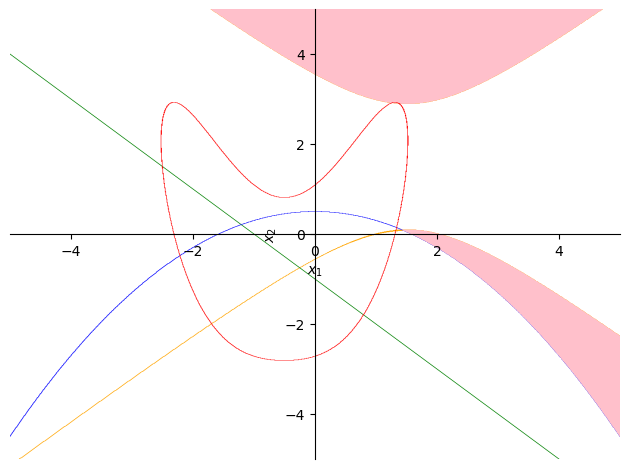

In [60]:
p1 = sp.plot_implicit(D[0], X[0], X[1], line_color='blue', show=False)
p2 = sp.plot_implicit(D[1], X[0], X[1], line_color='green', show=False)
p3 = sp.plot_implicit(D[2], X[0], X[1], line_color='orange', show=False)
p4 = sp.plot_implicit(sp.And(D[2] <= 0, D[1] <= 0, D[0] <= 0), X[0], X[1], line_color='pink', show=False)
p5 = sp.plot_implicit(F - 8.56061431459253, X[0], X[1], line_color='red', show=False)

p3.append(p2[0])
p3.append(p1[0])
p3.append(p4[0])
p3.append(p5[0])
p3.show()


Точка касания линий уровня с множеством $D$ в точке $(1.32386960694138, 2.92513926174216)$